## Radial Basis Function (RBF) network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(num_points = 100):
    X = np.linspace(-5, 5, num_points)
    y = np.sin(X) + 0.1 * np.random.randn(num_points)
    return X.reshape(-1, 1), y.reshape(-1, 1)

In [3]:
class RBFNetwork:
    def __init__(self, num_centers, input_dim, sigma=1.0):
        self.num_centers = num_centers
        self.input_dim = input_dim
        self.sigma = sigma

        self.centers = np.random.uniform(-5, 5, (num_centers, input_dim))

        self.weights = np.random.rand(num_centers, 1)
        
    def rbf(self, x, center):
        return np.exp(-np.linalg.norm(x - center)**2/(2 * self.sigma**2))

    def _calculate_rbf_output(self, X):
        rbf_outputs = np.zeros((X.shape[0], self.num_centers))
        for i, center in enumerate(self.centers):
            rbf_outputs[:, i] = np.apply_along_axis(self.rbf, 1, X, center)
        return rbf_outputs

    def fit(self, X, y):
        rbf_outputs = self._calculate_rbf_output(X)
        self.weights = np.linalg.pinv(rbf_outputs).dot(y)

    def predict(self, X):
        rbf_outputs = self._calculate_rbf_output(X)
        return rbf_outputs.dot(self.weights)

In [4]:
X_train, y_train = generate_data()

num_centers = 10
rbf_networks = RBFNetwork(num_centers=num_centers, input_dim=1, sigma=1.0)
rbf_networks.fit(X_train, y_train)

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
y_pred = rbf_networks.predict(X_test)

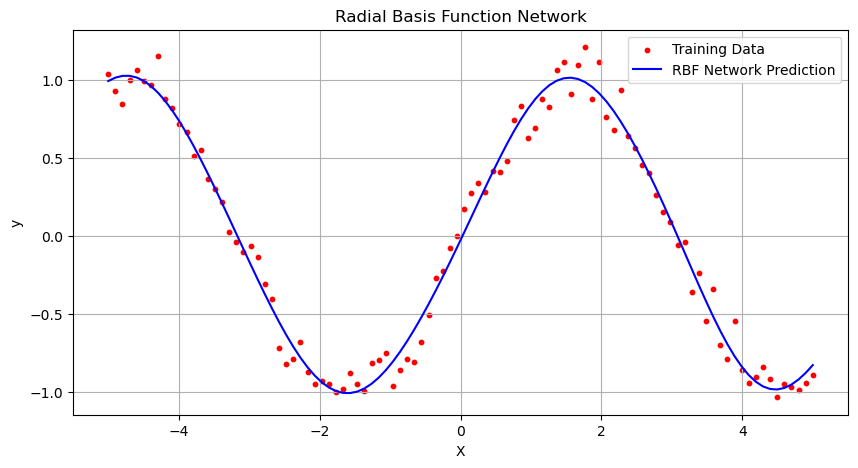

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='red', label='Training Data', s=10)
plt.plot(X_test, y_pred, color='blue', label='RBF Network Prediction')
plt.title('Radial Basis Function Network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()